In [208]:
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
#Load the data from the tenant and building raw data
tenant_df = pd.read_csv(r"..\Data Analysis\DataSets\TenantDataCombined.csv")
building_df = pd.read_csv(r"..\Data Analysis\DataSets\PropertyAndTenantDataCombined.csv")

C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_11632\203019522.py:3: DtypeWarning:

Columns (5,6,17,20,21,22,23,34,35,36,42,49,50,51,57,63,69,71,73,82,84,93,95,104,106,113,115,117,126,128,137,139,146,148,150,154,157,159,161,168,170,172,179,181,183,190,192,194,201,203,209,212,214,216,220,223,225,227,234,236,238,245,247,249,253,254,255,256,258,260,261,264,265,266,267,269,271,272,275,276,277,278,280,282,283,286,287,288,289,291,293,294,297,298,299,300,302,304,305,308,309,310,311,313,315,316,319,320,321,322,324,326,327,330,331,332,335,337,338,341,342,343,344,346,348,349,352,353,354,357,359,360,363,364,365,368,370,371,374,375,376,377,379,381,382,385,386,387,388,390,392,393,396,397,398,401,403,404,407,408,409,412,414,415,418,419,420,423,425,426,429,430,431,434,436,437,440,441,442,443,445,447,448,451,452,453,454,456,458,459,462,463,464,467,469,470,473,474,475,476,478,480,481,484,485,486,489,491,492,495,496,497,500,502,503,506,507,508,509,511,513,514,517,518,519,522,524,525,528,529,530,531,53

In [210]:
property_count = building_df['Address'].value_counts().sum()
disadvantaged_property_df = building_df[building_df['Identified as disadvantaged'] == True]
disadvantaged_property_count = disadvantaged_property_df['Address'].value_counts().sum()

print(f'Property Count = {property_count}')
print(f'Disadvantaged Property Count = {disadvantaged_property_count}')
print(f'% of Disdadvantaged Properties = {disadvantaged_property_count/property_count}')

Property Count = 6611
Disadvantaged Property Count = 2499
% of Disdadvantaged Properties = 0.3780063530479504


0.10377668308702792
The percentage of Triple Net Leases is 0.6772151898734177


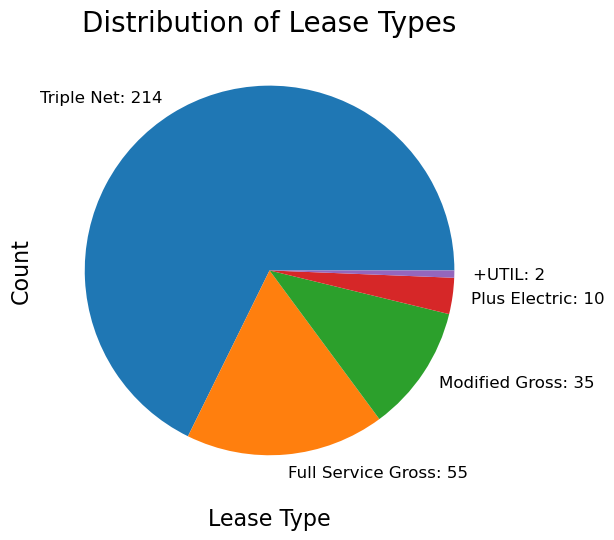

In [211]:

# Your existing code for getting value counts
building_df = building_df.drop_duplicates('Address')
lease_counts = building_df['Direct Services'].value_counts()
# print(lease_counts['Triple Net']/building_df['Direct Services'].count())
print(building_df['Direct Services'].count()/building_df['Address'].count())
print('The percentage of Triple Net Leases is ' + str(lease_counts['Triple Net']/building_df['Direct Services'].count()))
# Plotting the pie chart
plt.figure(figsize=(9, 6))
plt.rc('xtick', labelsize=12)
wedges, texts, _ = plt.pie(lease_counts, labels=lease_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = lease_counts.iloc[i]
    text.set_text(f'{lease_counts.index[i]}: {count}')

plt.xlabel('Lease Type', {'size': 16})
plt.ylabel('Count', {'size': 16})
plt.title('Distribution of Lease Types', {'size': 20})

plt.show()


0.08888888888888889
The percentage of Triple Net Leases in Disadvantaged Communities is 0.7708333333333334


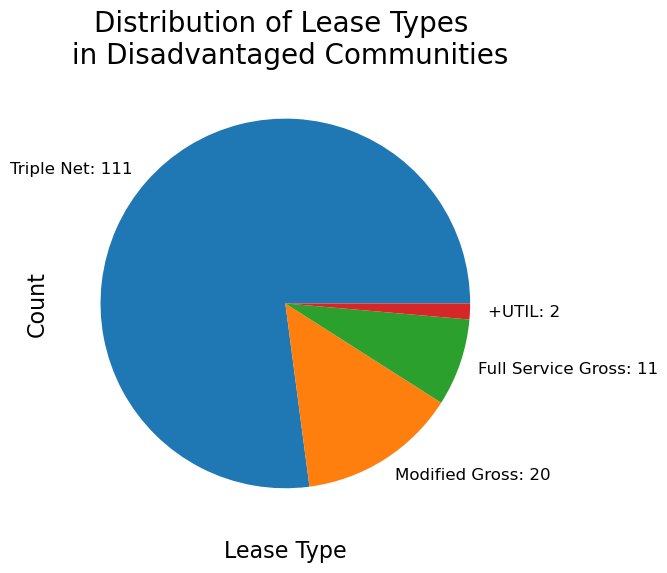

In [212]:
#Filter for buildings that are identified as being in disadvantaged communities
disadvantaged_lease_type_df = building_df[building_df['Identified as disadvantaged']==True]

#count the number of lease types
disad_lease_counts = disadvantaged_lease_type_df['Direct Services'].value_counts()
print(disadvantaged_lease_type_df['Direct Services'].count()/disadvantaged_lease_type_df['Address'].count())
print('The percentage of Triple Net Leases in Disadvantaged Communities is ' + str(disad_lease_counts['Triple Net']/disadvantaged_lease_type_df['Direct Services'].count()))
# Step 4: Create a bar chart
plt.figure(figsize=(9, 6))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 12) 
wedges, texts, _ = plt.pie(disad_lease_counts, labels=disad_lease_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = disad_lease_counts.iloc[i]
    text.set_text(f'{disad_lease_counts.index[i]}: {count}')
    
plt.xlabel('Lease Type',
           {'size':16})
plt.ylabel('Count',
           {'size':16})
plt.title('Distribution of Lease Types \n in Disadvantaged Communities',
          {'size':20})

plt.show()

0.12070175438596491
The percentage of Triple Net Leases in Disadvantaged Communities is 0.5988372093023255


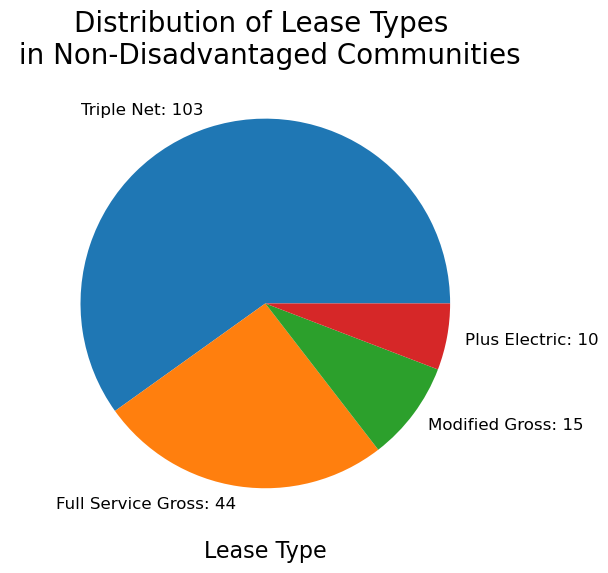

In [213]:
#Filter for buildings that are identified as being in disadvantaged communities
non_disadvantaged_lease_type_df = building_df[building_df['Identified as disadvantaged'].isin([False, None, np.nan])]


#count the number of lease types
non_disad_lease_counts = non_disadvantaged_lease_type_df['Direct Services'].value_counts()
print(non_disadvantaged_lease_type_df['Direct Services'].count()/non_disadvantaged_lease_type_df['Address'].count())
print('The percentage of Triple Net Leases in Disadvantaged Communities is ' + str(non_disad_lease_counts['Triple Net']/non_disadvantaged_lease_type_df['Direct Services'].count()))
# Step 4: Create a bar chart
plt.figure(figsize=(9, 6))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 12) 
wedges, texts, _ = plt.pie(non_disad_lease_counts, labels=non_disad_lease_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = non_disad_lease_counts.iloc[i]
    text.set_text(f'{non_disad_lease_counts.index[i]}: {count}')
    
plt.xlabel('Lease Type',
           {'size':16})

plt.title('Distribution of Lease Types \n in Non-Disadvantaged Communities',
          {'size':20})

plt.show()

In [214]:
import pandas as pd
import plotly.graph_objects as go

# Assuming you have lease_counts, non_disad_lease_counts, and disad_lease_counts as Series

# Step 1: Combine the series into a DataFrame
combined_df = pd.DataFrame({
    'All Buildings': lease_counts,
    'Buidlings in DAC': disad_lease_counts,
    'Buildings in Non-DAC': non_disad_lease_counts,
    
}).fillna(0)

# Step 2: Create a bar chart using Plotly
fig = go.Figure()

for column in combined_df.columns:
    fig.add_trace(go.Bar(
        x=combined_df.index,
        y=combined_df[column],
        text=combined_df[column],  # Add the values to the bars
        textposition='outside',
        name=column
    ))

# Add note text
note_text = "*Counts that are equal to zero were not available in the CoStar Data"
fig.add_annotation(
    go.layout.Annotation(
        text=note_text,
        align='left',
        showarrow=False,
        xref='paper', yref='paper',
        x=0, y=1, xanchor='left', yanchor='bottom',
        font=dict(size=10, color='gray')
    )
)

# Update layout
fig.update_layout(
    barmode='group',
    title_x=0.5,
    xaxis=dict(title='Lease Type'),
    yaxis=dict(title='Count'),
    legend=dict(
        font=dict(size=14),
        x=0,
        y=1.0,
        xanchor='left',
        yanchor='top'
    ),
    width=800,
    height=600
)

# Show the plot
fig.show()


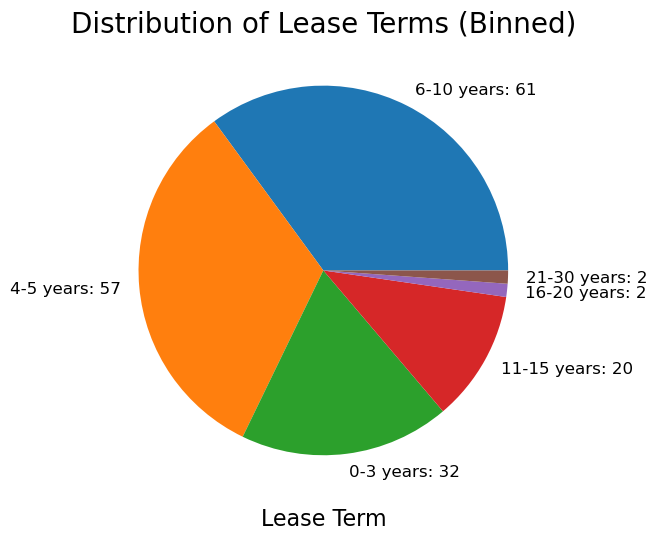

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have building_df with 'Lease Term (Years)' column

# Create bins for lease terms
bins = [0, 3, 5, 10, 15, 20, 30]  # Customize bin edges as needed
labels = ['0-3 years', '4-5 years', '6-10 years', '11-15 years', '16-20 years', '21-30 years']

# Bin the lease terms
building_df['Lease Term Bins'] = pd.cut(building_df['Lease Term (Years)'], bins=bins, labels=labels, right=False)

# Getting value counts for the bins
lease_bins_counts = building_df['Lease Term Bins'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(9, 6))
plt.rc('xtick', labelsize=12)
wedges, texts, _ = plt.pie(lease_bins_counts, labels=lease_bins_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = lease_bins_counts.iloc[i]
    text.set_text(f'{lease_bins_counts.index[i]}: {count}')

plt.xlabel('Lease Term', {'size': 16})
plt.title('Distribution of Lease Terms (Binned)', {'size': 20})

plt.show()


C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_11632\2616288492.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



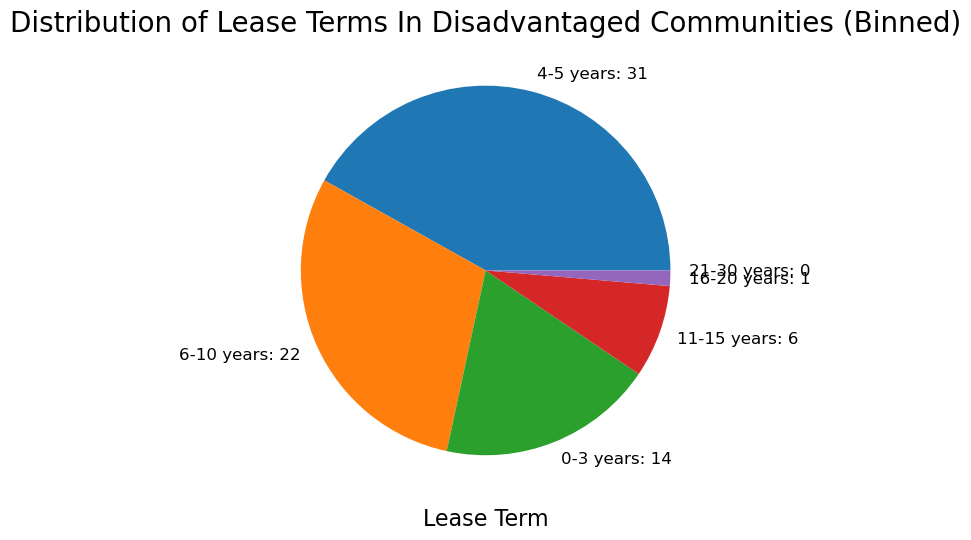

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have building_df with 'Lease Term (Years)' column

# Create bins for lease terms
bins = [0, 3, 5, 10, 15, 20, 30]  # Customize bin edges as needed
labels = ['0-3 years', '4-5 years', '6-10 years', '11-15 years', '16-20 years', '21-30 years']

# Bin the lease terms
disadvantaged_building_df = building_df[building_df['Identified as disadvantaged'] == True]
disadvantaged_building_df['Lease Term Bins'] = pd.cut(disadvantaged_building_df['Lease Term (Years)'], bins=bins, labels=labels, right=False)

# Getting value counts for the bins
lease_bins_counts = disadvantaged_building_df['Lease Term Bins'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(9, 6))
plt.rc('xtick', labelsize=12)
wedges, texts, _ = plt.pie(lease_bins_counts, labels=lease_bins_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = lease_bins_counts.iloc[i]
    text.set_text(f'{lease_bins_counts.index[i]}: {count}')

plt.xlabel('Lease Term', {'size': 16})
plt.title('Distribution of Lease Terms In Disadvantaged Communities (Binned)', {'size': 20})

plt.show()


C:\Users\ltaylor2\AppData\Local\Temp\1\ipykernel_11632\835493702.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



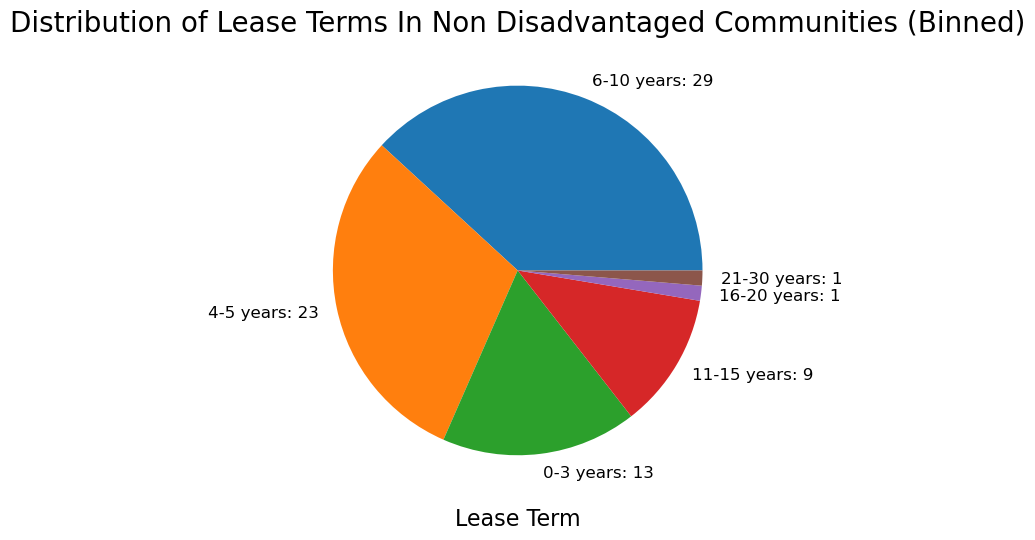

In [217]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have building_df with 'Lease Term (Years)' column

# Create bins for lease terms
bins = [0, 3, 5, 10, 15, 20, 30]  # Customize bin edges as needed
labels = ['0-3 years', '4-5 years', '6-10 years', '11-15 years', '16-20 years', '21-30 years']

# Bin the lease terms
disadvantaged_building_df = building_df[building_df['Identified as disadvantaged'] == False]
disadvantaged_building_df['Lease Term Bins'] = pd.cut(disadvantaged_building_df['Lease Term (Years)'], bins=bins, labels=labels, right=False)

# Getting value counts for the bins
lease_bins_counts = disadvantaged_building_df['Lease Term Bins'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(9, 6))
plt.rc('xtick', labelsize=12)
wedges, texts, _ = plt.pie(lease_bins_counts, labels=lease_bins_counts.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = lease_bins_counts.iloc[i]
    text.set_text(f'{lease_bins_counts.index[i]}: {count}')

plt.xlabel('Lease Term', {'size': 16})
plt.title('Distribution of Lease Terms In Non Disadvantaged Communities (Binned)', {'size': 20})

plt.show()


0.12061068702290076
The percentage of Triple Net Leases is 0.740506329113924


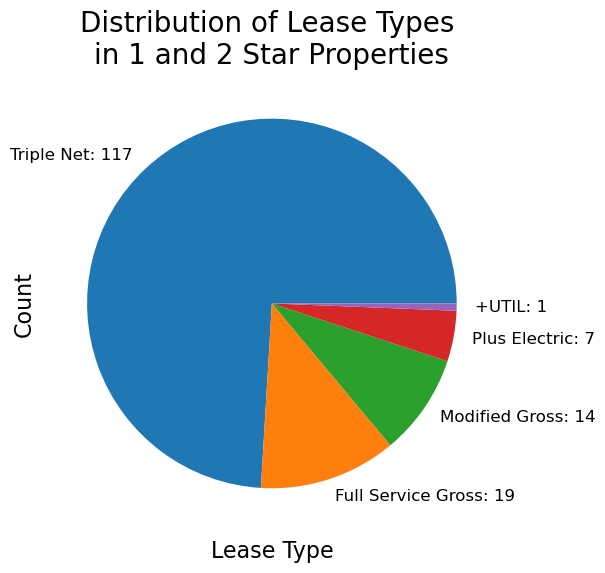

In [218]:
# Your existing code for getting value counts
star_1_2_bulding_df = building_df[building_df['Star Rating'] == 1 | 2]
lease_counts_star = star_1_2_bulding_df['Direct Services'].value_counts()
# print(lease_counts['Triple Net']/building_df['Direct Services'].count())
print(star_1_2_bulding_df['Direct Services'].count()/star_1_2_bulding_df['Address'].count())
print('The percentage of Triple Net Leases is ' + str(lease_counts_star['Triple Net']/star_1_2_bulding_df['Direct Services'].count()))
# Plotting the pie chart
plt.figure(figsize=(9, 6))
plt.rc('xtick', labelsize=12)
wedges, texts, _ = plt.pie(lease_counts_star, labels=lease_counts_star.index, autopct='', startangle=0)

# Adding count annotations just after the wedge labels
for i, text in enumerate(texts):
    count = lease_counts_star.iloc[i]
    text.set_text(f'{lease_counts_star.index[i]}: {count}')

plt.xlabel('Lease Type', {'size': 16})
plt.ylabel('Count', {'size': 16})
plt.title('Distribution of Lease Types \nin 1 and 2 Star Properties', {'size': 20})

plt.show()


6218


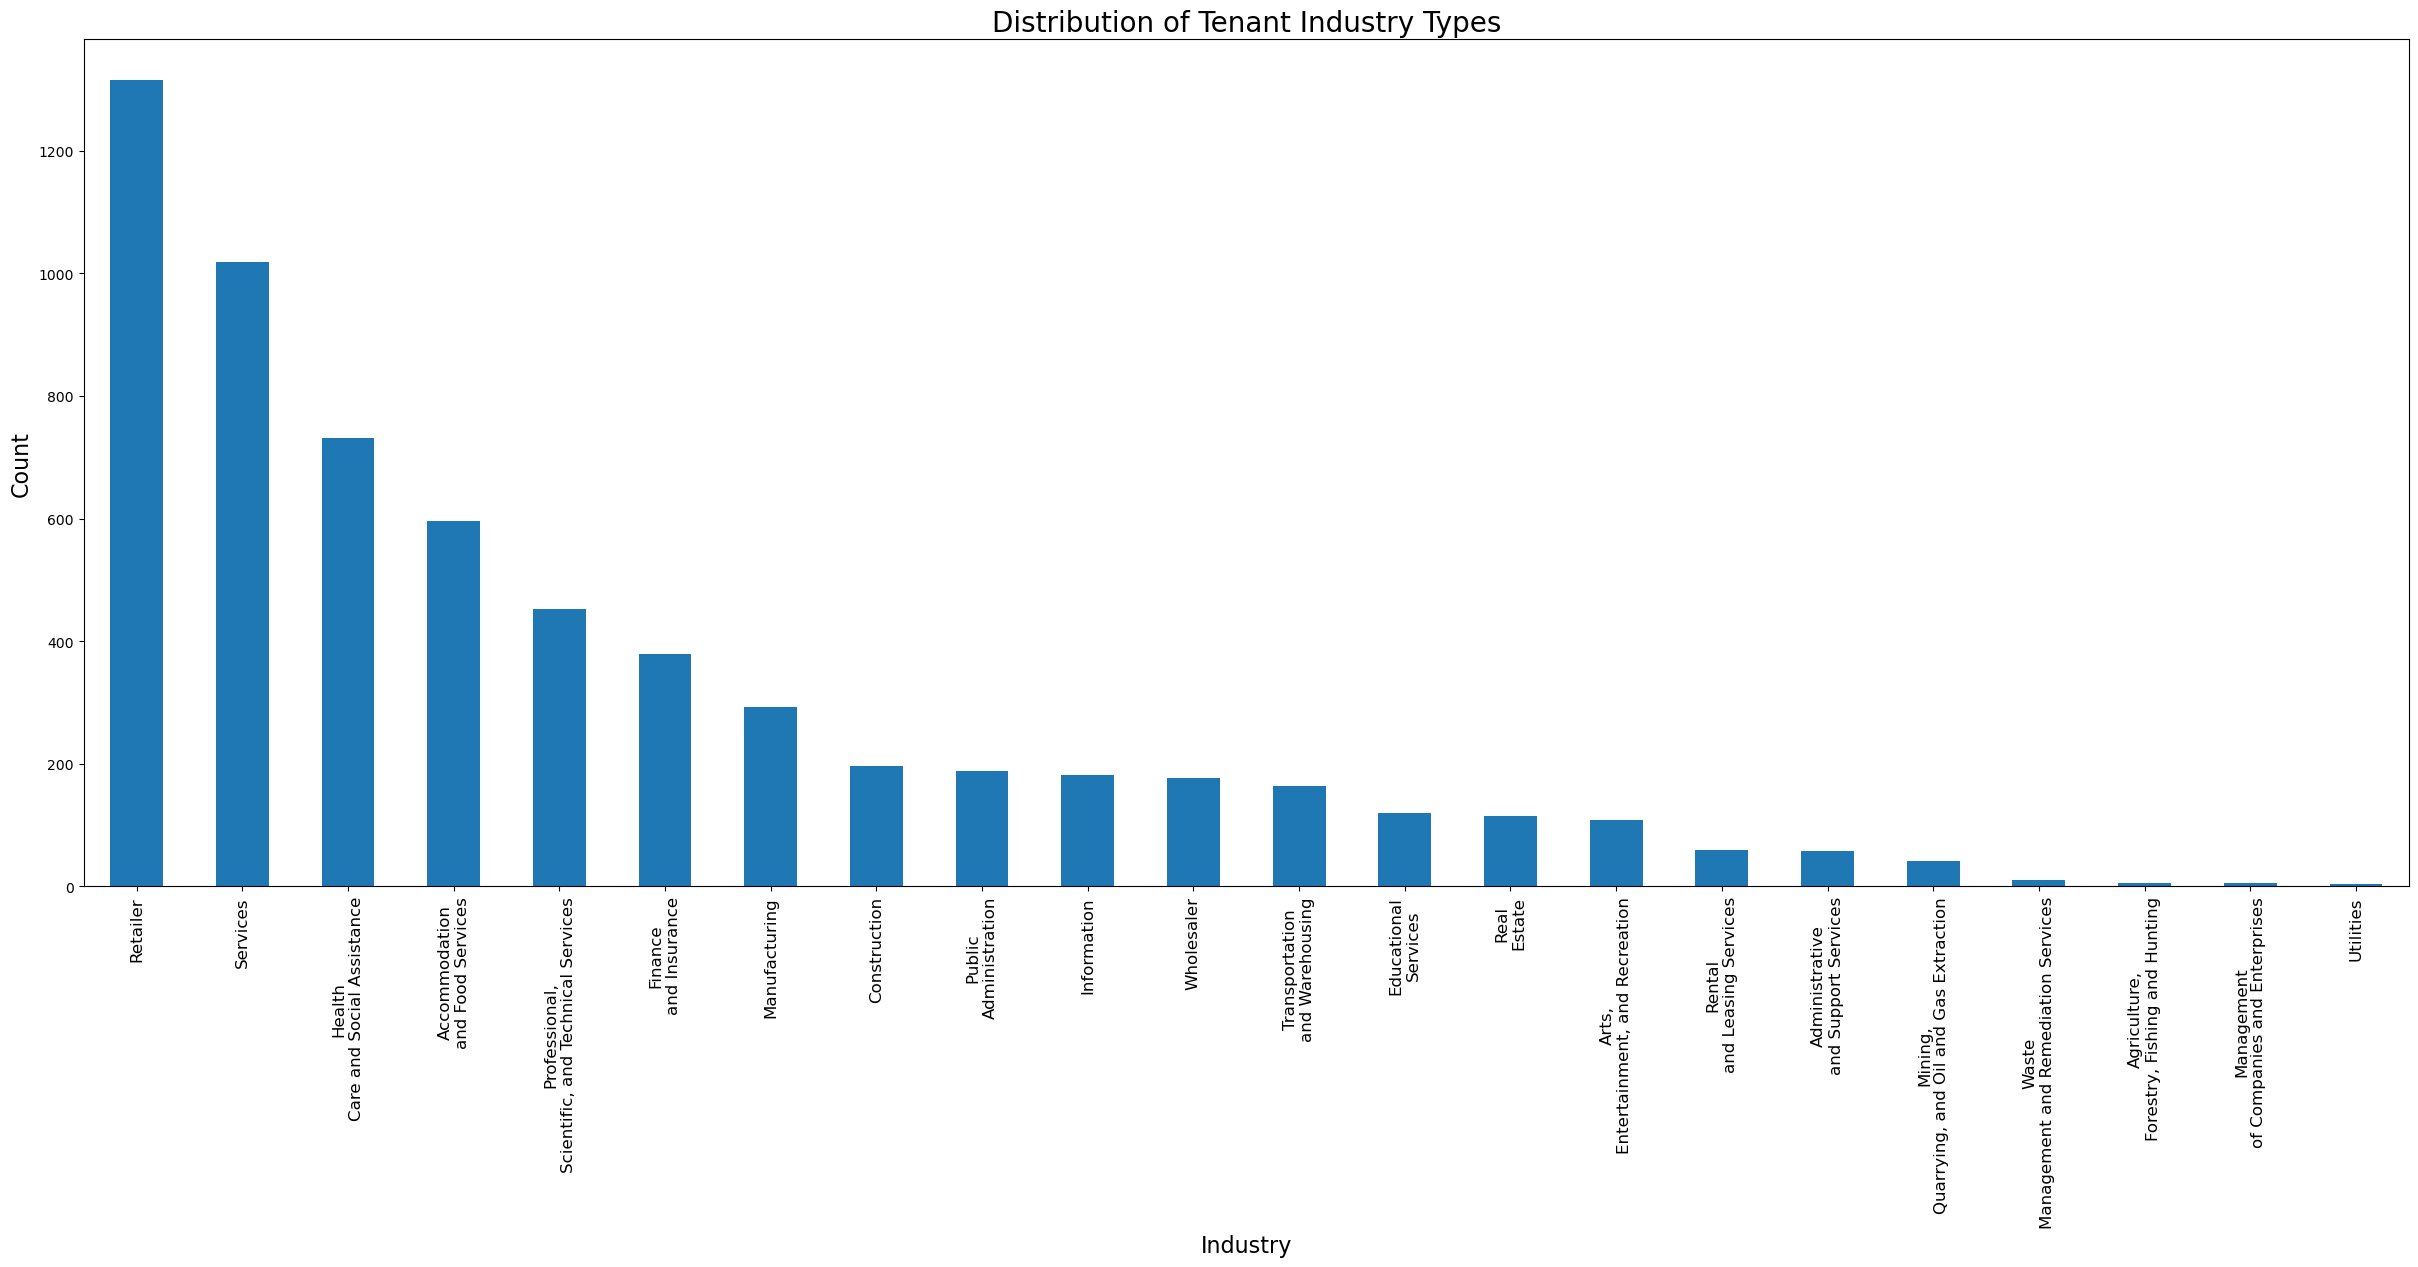

In [219]:
industry_counts = tenant_df['Industry'].value_counts()
print(industry_counts.sum())
# Step 4: Create a bar chart
plt.figure(figsize=(30, 11))  # Optional: Set the figure size
ax = industry_counts.plot(kind='bar', rot=90)  # Create a bar chart with no rotation of labels
plt.xlabel('Industry',
           {'size': 16})
plt.ylabel('Count',
           {'size': 16} )
plt.title('Distribution of Tenant Industry Types',
          {'size': 20})
# Stacking x-axis labels
stacked_labels = [label[:label.find(' ')] + '\n' + label[label.find(' ')+1:] if ' ' in label else label for label in industry_counts.index]
ax.set_xticklabels(stacked_labels, rotation=90)

plt.show()

2607


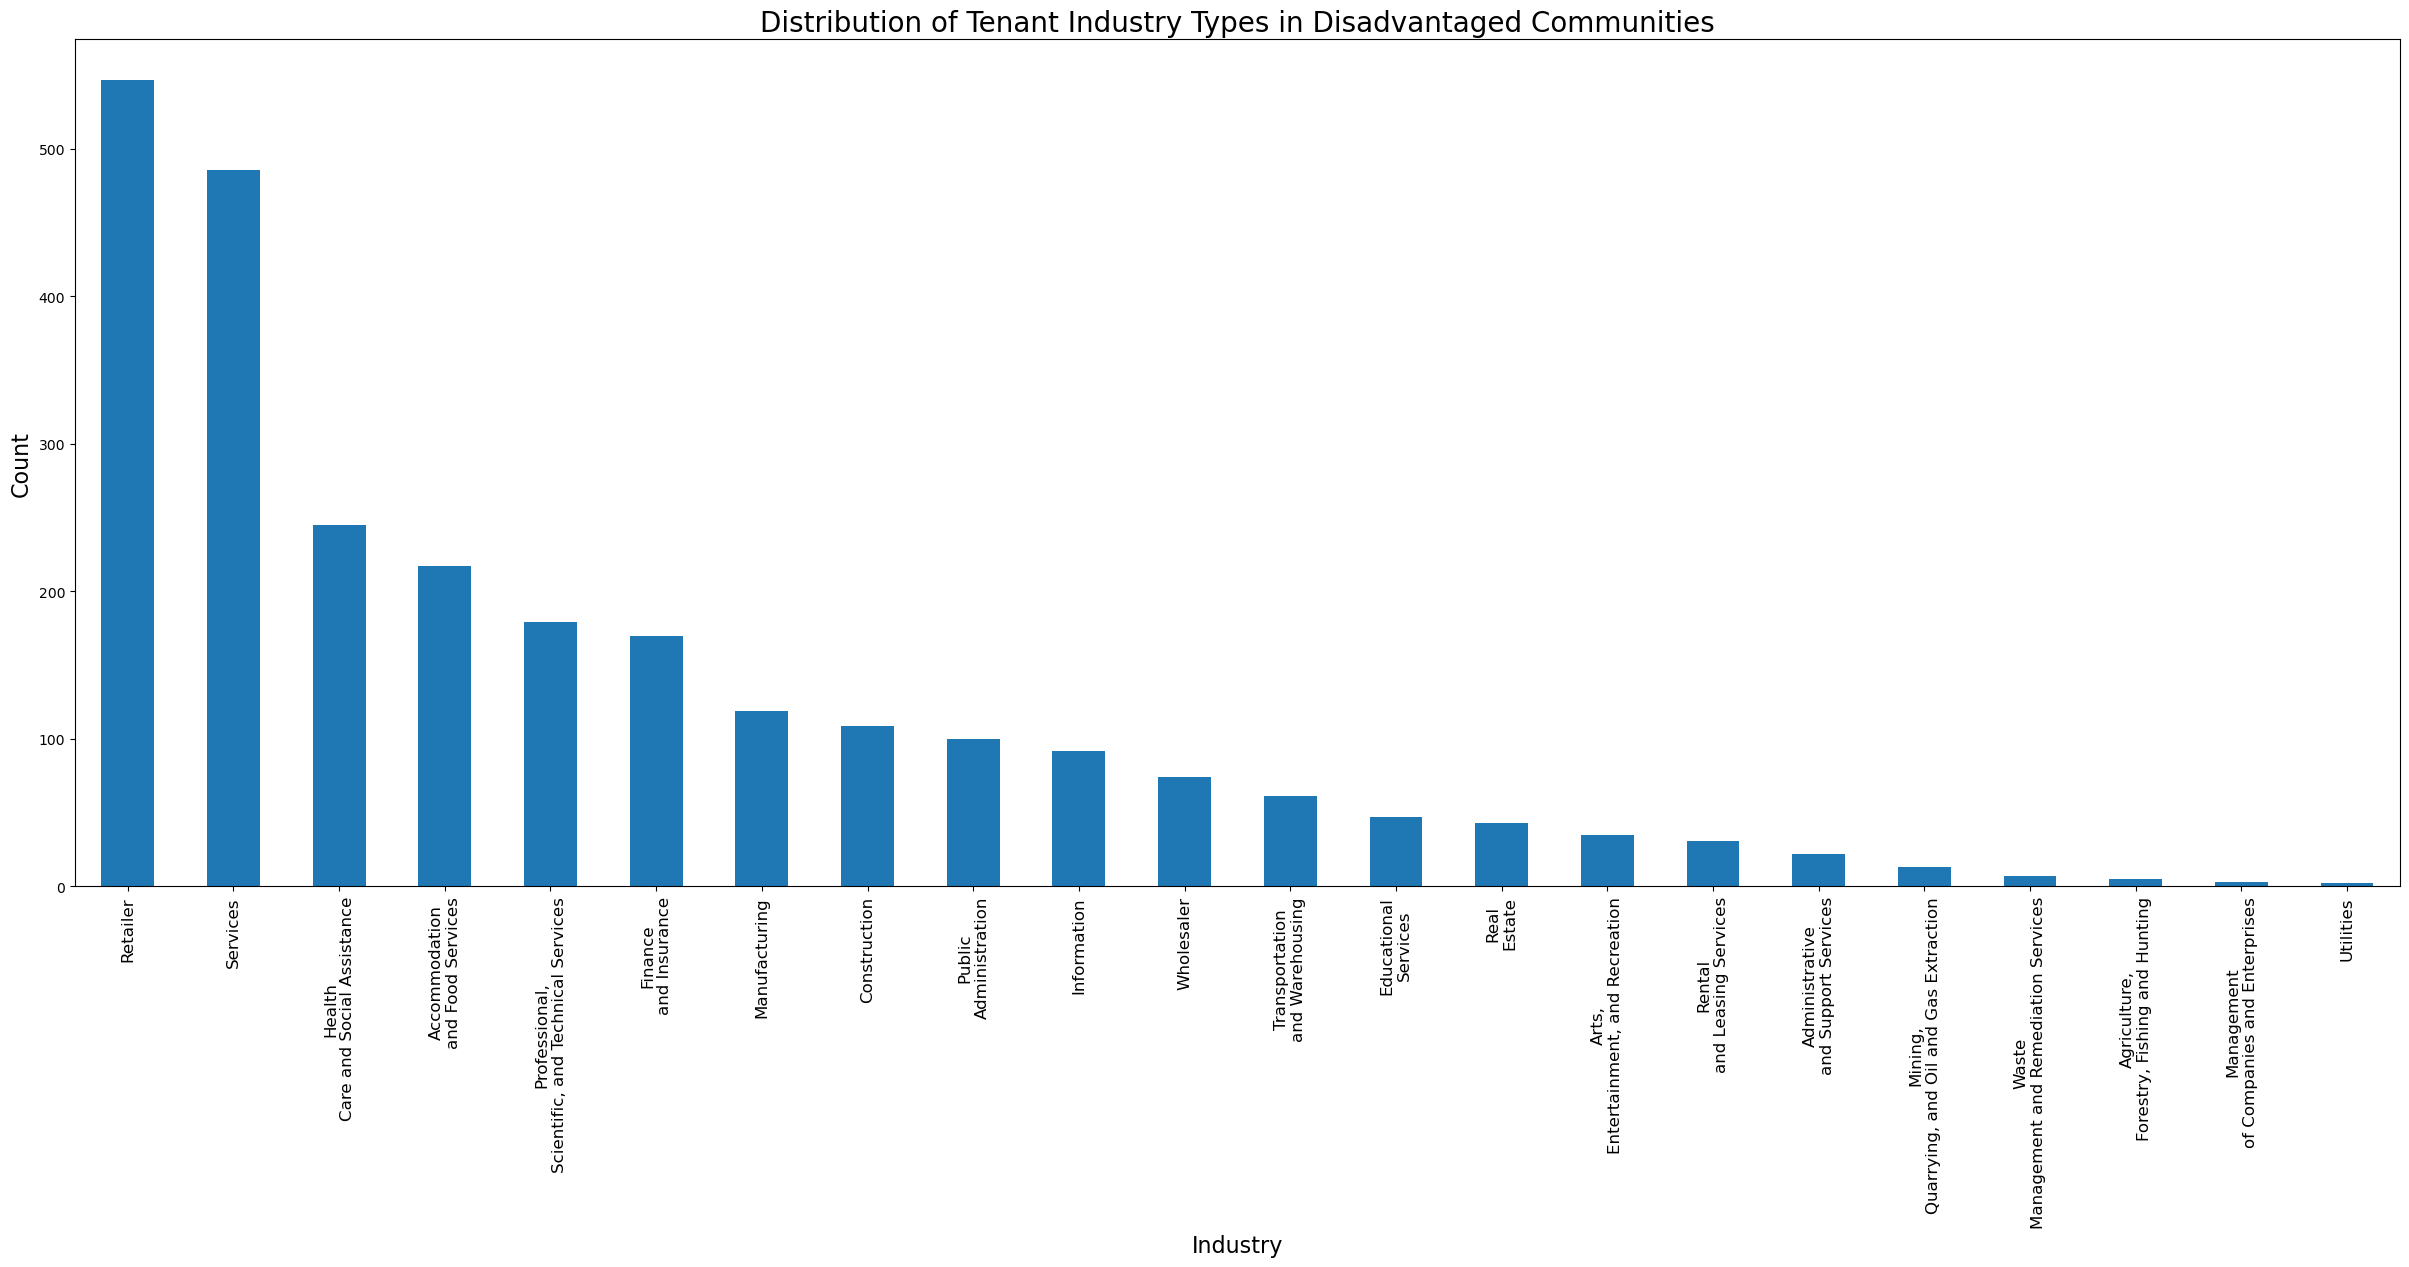

In [220]:
disadvantaged_prop_df =pd.read_csv(r"..\Data Analysis\DataSets\Disadvantage Status of Buildings\DisadvantagedStatusOfBuildingsAurora.csv")

merged_tenant_disadvantaged_df = tenant_df.merge(disadvantaged_prop_df, on = 'Address', how='left') 

disadvantaged_industry_df = merged_tenant_disadvantaged_df[merged_tenant_disadvantaged_df['Identified as disadvantaged'] == True]

disadvantaged_industry_counts = disadvantaged_industry_df['Industry'].value_counts()
print(disadvantaged_industry_counts.sum())
# Step 4: Create a bar chart
plt.figure(figsize=(30, 11))  # Optional: Set the figure size
ax = disadvantaged_industry_counts.plot(kind='bar', rot=90)  # Create a bar chart with no rotation of labels
plt.xlabel('Industry',
           {'size': 16})
plt.ylabel('Count',
           {'size': 16} )
plt.title('Distribution of Tenant Industry Types in Disadvantaged Communities',
          {'size': 20})
# Stacking x-axis labels
stacked_labels = [label[:label.find(' ')] + '\n' + label[label.find(' ')+1:] if ' ' in label else label for label in industry_counts.index]
ax.set_xticklabels(stacked_labels, rotation=90)

plt.show()

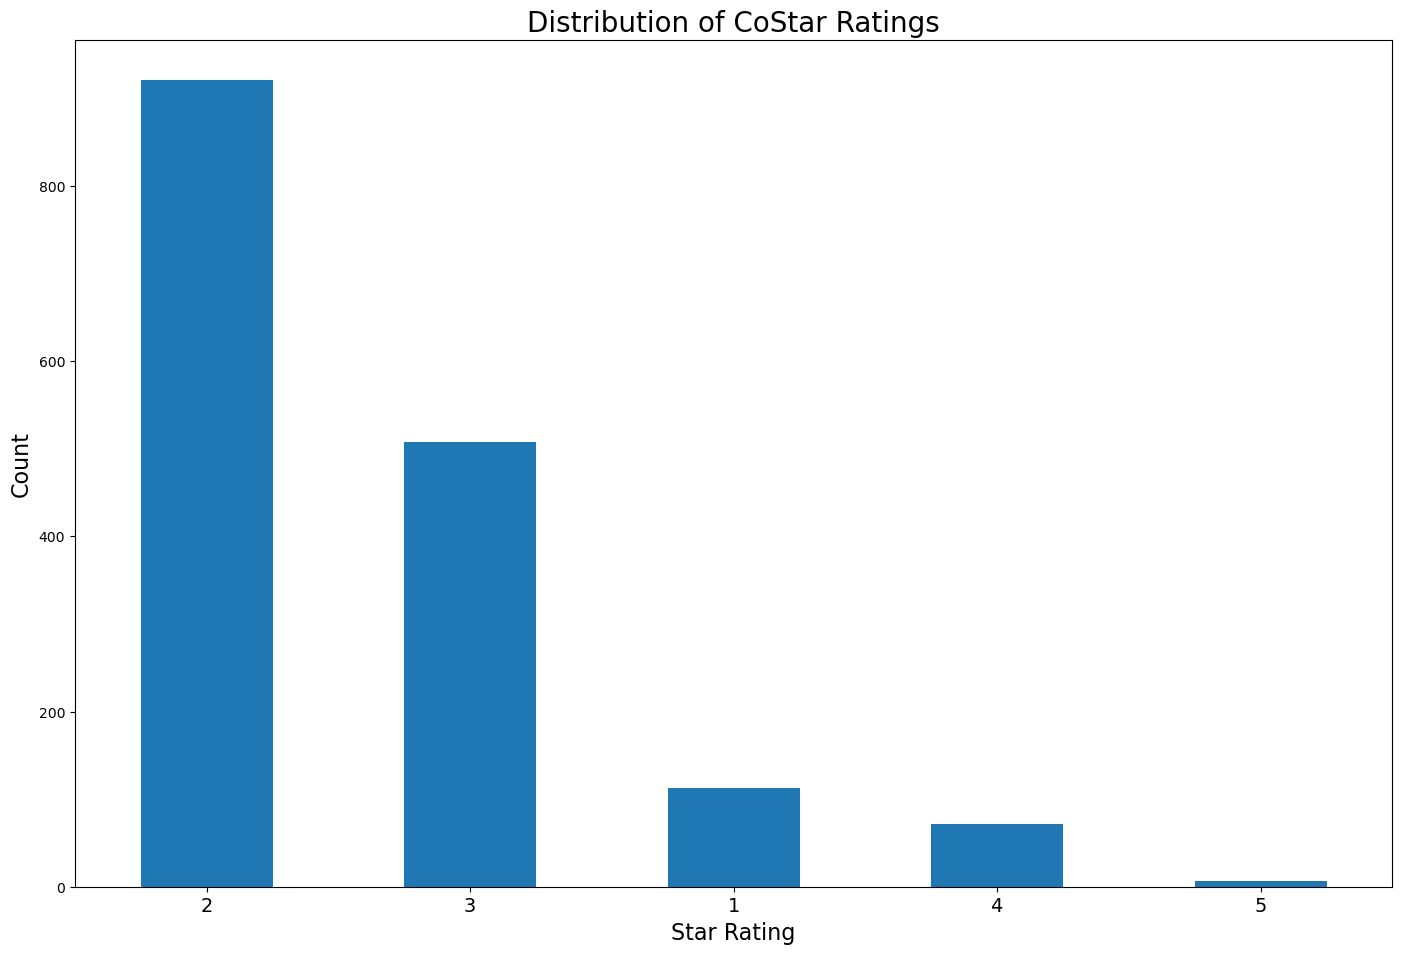

In [221]:
# #Filter for buildings that are identified as being in disadvantaged communities
# disadvantaged_lease_type_df = building_df[building_df['Identified as disadvantaged']==True]

#count the number of lease types
lease_counts = disadvantaged_lease_type_df['Star Rating'].value_counts()


# Step 4: Create a bar chart
plt.figure(figsize=(17, 11))  # Optional: Set the figure size
plt.rc('xtick', labelsize = 14) 
lease_counts.plot(kind='bar', rot=0,)  # Create a bar chart with no rotation of labels

plt.xlabel('Star Rating',
           {'size':16})
plt.ylabel('Count',
           {'size':16})
plt.title('Distribution of CoStar Ratings',
          {'size':20})

plt.show()